In [35]:
import pandas as pd
import numpy as np


In [36]:
train_df = pd.read_csv('../data/interim/train_data_cleaned.csv')
valid_df = pd.read_csv('../data/interim/validation_data_cleaned.csv')
pd.set_option('display.max_columns', None)

In [37]:
train_df

,country_code,demog_1,demog_2,demog_3,city_tier,occupation,demog_4,demog_5,demog_6,demog_7,demog_8,demog_9,demog_11,demog_12,demog_13,demog_14,demog_15,demog_16,demog_17,demog_18,demog_19,demog_20,demog_21,others_1,others_2,others_3,others_4,others_5,others_6,others_7,others_8,others_9,others_10,others_11,others_12,others_13,others_14,others_18,others_19,others_20,others_21,others_22,others_23,others_24,others_25,others_26,others_27,others_28,others_29,others_30,others_31,others_32,demog_23,demog_24,demog_25,demog_26,demog_27,demog_28,demog_29,demog_30,demog_31,demog_32,demog_33,demog_34,demog_35,demog_36,demog_37,demog_38,others_33,others_34,others_35,others_36,others_37,others_38,others_39,others_40,others_41,demog_39,email_domain,demog_40,demog_41,demog_42,demog_43,account_opening_month,account_opening_year,income_category,Target
0,0.0,53.0,3.0,101.0,0.0,5.0,0.0,3.0,1.0,1.0,41.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,168.0,133.0,2.0,689.0,133.0,3.0,168.0,168.0,1.0,1.0,0.0,0.0,8.0,16.0,0.0,0.0,8.0,16.0,9999.0,9999.0,0.0,0.0,0.0,0.0,168.0,7481.0,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0
1,0.0,55.0,1.0,101.0,1.0,4.0,0.0,2.0,1.0,1.0,41.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,185.0,185.0,1.0,568.0,185.0,3.0,185.0,185.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,13.0,9999.0,9999.0,0.0,0.0,0.0,0.0,185.0,17461.0,0.0,48.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,0
2,0.0,55.0,3.0,101.0,2.0,5.0,0.0,4.0,1.0,1.0,41.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,239.0,239.0,1.0,239.0,239.0,1.0,239.0,239.0,1.0,1.0,0.0,0.0,4.0,14.0,0.0,0.0,4.0,14.0,9999.0,9999.0,0.0,0.0,0.0,0.0,239.0,8788.0,0.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0,0
3,0.0,53.0,3.0,101.0,7.0,5.0,0.0,4.0,1.0,1.0,41.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,127.0,127.0,1.0,127.0,127.0,1.0,127.0,127.0,1.0,1.0,0.0,0.0,4.0,21.0,0.0,0.0,4.0,21.0,9999.0,9999.0,0.0,0.0,0.0,0.0,127.0,7065.0,0.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,0
4,0.0,55.0,6.0,101.0,1.0,6.0,0.0,4.0,1.0,1.0,41.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.0,200.0,1.0,200.0,200.0,1.0,200.0,200.0,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,3.0,9999.0,9999.0,0.0,0.0,0.0,0.0,200.0,8617.0,0.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96330,0.0,55.0,2.0,101.0,0.0,5.0,0.0,4.0,1.0,1.0,42.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,49.0,1.0,49.0,49.0,1.0,49.0,49.0,1.0,1.0,0.0,0.0,15.0,15.0,3.0,7.0,18.0,22.0,9999.0,9999.0,0.0,0.0,0.0,0.0,49.0,7299.0,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1
96331,0.0,55.0,6.0,101.0,0.0,6.0,0.0,3.0,1.0,1.0,41.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,8.0,1.0,370.0,8.0,2.0,8.0,8.0,1.0,1.0,0.0,0.0,13.0,13.0,13.0,13.0,26.0,26.0,9999.0,9999.0,0.0,0.0,0.0,0.0,9.0,9089.0,0.0,25.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1
96332,0.0,55.0,1.0,101.0,6.0,4.0,0.0,4.0,1.0,1.0,41.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,23.0,1.0,23.0,23.0,1.0,23.0,23.0,1.0

In [38]:
X = train_df.drop(columns='Target')
y = train_df['Target']

## Removing Fetures with Zero Variance i.e. constant features

In [41]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold of 0 to remove constant features
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(X)

# If you want to keep the selected feature names:
selected_features = X.columns[selector.get_support(indices=True)]
X = X[selected_features]
valid_df = valid_df[selected_features]


In [42]:
X

,demog_1,demog_2,demog_3,city_tier,occupation,demog_4,demog_5,demog_8,demog_9,demog_15,demog_20,demog_21,others_1,others_2,others_5,others_6,others_7,others_8,others_9,others_10,others_11,others_12,others_13,others_21,others_22,others_23,others_24,others_25,others_26,others_27,others_28,demog_23,demog_24,demog_26,demog_30,demog_32,others_35,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month,account_opening_year,income_category
0,53.0,3.0,101.0,0.0,5.0,0.0,3.0,41.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,168.0,133.0,2.0,689.0,133.0,3.0,168.0,168.0,8.0,16.0,0.0,0.0,8.0,16.0,9999.0,9999.0,168.0,7481.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0
1,55.0,1.0,101.0,1.0,4.0,0.0,2.0,41.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,185.0,185.0,1.0,568.0,185.0,3.0,185.0,185.0,0.0,13.0,0.0,0.0,0.0,13.0,9999.0,9999.0,185.0,17461.0,48.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
2,55.0,3.0,101.0,2.0,5.0,0.0,4.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,239.0,239.0,1.0,239.0,239.0,1.0,239.0,239.0,4.0,14.0,0.0,0.0,4.0,14.0,9999.0,9999.0,239.0,8788.0,24.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
3,53.0,3.0,101.0,7.0,5.0,0.0,4.0,41.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,127.0,127.0,1.0,127.0,127.0,1.0,127.0,127.0,4.0,21.0,0.0,0.0,4.0,21.0,9999.0,9999.0,127.0,7065.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
4,55.0,6.0,101.0,1.0,6.0,0.0,4.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,200.0,200.0,1.0,200.0,200.0,1.0,200.0,200.0,1.0,3.0,0.0,0.0,1.0,3.0,9999.0,9999.0,200.0,8617.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96330,55.0,2.0,101.0,0.0,5.0,0.0,4.0,42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,49.0,1.0,49.0,49.0,1.0,49.0,49.0,15.0,15.0,3.0,7.0,18.0,22.0,9999.0,9999.0,49.0,7299.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
96331,55.0,6.0,101.0,0.0,6.0,0.0,3.0,41.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,8.0,8.0,1.0,370.0,8.0,2.0,8.0,8.0,13.0,13.0,13.0,13.0,26.0,26.0,9999.0,9999.0,9.0,9089.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0
96332,55.0,1.0,101.0,6.0,4.0,0.0,4.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,23.0,1.0,23.0,23.0,1.0,23.0,23.0,8.0,8.0,0.0,0.0,8.0,8.0,9999.0,9999.0,23.0,9629.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
96333,55.0,1.0,101.0,1.0,2.0,0.0,3.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,106.0,1.0,106.0,106.0,1.0,106.0,106.0,2.0,21.0,0.0,0.0,2.0,21.0,9999.0,9999.0,106.0,8487.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0


In [43]:
valid_df

,demog_1,demog_2,demog_3,city_tier,occupation,demog_4,demog_5,demog_8,demog_9,demog_15,demog_20,demog_21,others_1,others_2,others_5,others_6,others_7,others_8,others_9,others_10,others_11,others_12,others_13,others_21,others_22,others_23,others_24,others_25,others_26,others_27,others_28,demog_23,demog_24,demog_26,demog_30,demog_32,others_35,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month,account_opening_year,income_category
0,56.0,2.0,101.0,7.0,5.0,0.0,4.0,41.0,1.0,1.0,1.0,0.0,1.0,0.0,1.000000,133.0,133.0,1.0,797.0,133.0,4.0,133.0,133.0,6.000000,20.000000,1.000000,1.000000,7.000000,21.000000,9999.0,9999.0,133.0,11014.0,30.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0
1,55.0,1.0,101.0,5.0,4.0,0.0,2.0,41.0,1.0,1.0,0.0,0.0,0.0,0.0,0.645331,202.0,202.0,1.0,202.0,202.0,1.0,202.0,202.0,8.347624,24.156886,0.793387,1.446947,9.141011,25.603833,9999.0,9999.0,202.0,7320.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0
2,55.0,1.0,101.0,1.0,2.0,0.0,3.0,42.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,211.0,211.0,1.0,211.0,20.0,2.0,211.0,211.0,24.000000,29.000000,0.000000,0.000000,24.000000,29.000000,9999.0,9999.0,211.0,11938.0,33.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0
3,55.0,1.0,101.0,1.0,2.0,0.0,4.0,41.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,243.0,113.0,3.0,243.0,113.0,3.0,243.0,178.0,18.000000,73.000000,0.000000,0.000000,18.000000,73.000000,9999.0,9999.0,243.0,8008.0,22.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0
4,55.0,1.0,101.0,5.0,2.0,0.0,4.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,190.0,190.0,1.0,190.0,190.0,1.0,190.0,190.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999.0,9999.0,190.0,13181.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,401.0,2.0,101.0,6.0,5.0,0.0,2.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,101.0,101.0,1.0,101.0,101.0,1.0,101.0,101.0,0.000000,133.000000,0.000000,0.000000,0.000000,133.000000,9999.0,9999.0,116.0,12521.0,34.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
49994,53.0,3.0,101.0,2.0,5.0,0.0,4.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,59.0,59.0,1.0,59.0,59.0,1.0,59.0,59.0,9.000000,13.000000,0.000000,0.000000,9.000000,13.000000,9999.0,9999.0,59.0,6815.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
49995,53.0,3.0,101.0,0.0,5.0,0.0,4.0,41.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,88.0,88.0,1.0,226.0,88.0,2.0,88.0,88.0,25.000000,52.000000,0.000000,0.000000,25.000000,52.000000,9999.0,9999.0,104.0,7430.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
49996,401.0,6.0,101.0,5.0,6.0,0.0,2.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,50.0,50.0,1.0,50.0,50.0,1.0,50.0,50.0,79.000000,111.000000,278.000000,348.000000,357.000000,459.000000,9999.0,9999.0,50.0,7227.0,20.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0


# Feature Selection

In [46]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

### 1. RFE using random forest

In [ ]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RFECV with cross-validation
rfecv_rf = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='f1_macro')

# Fit RFECV
rfecv_rf.fit(X, y)

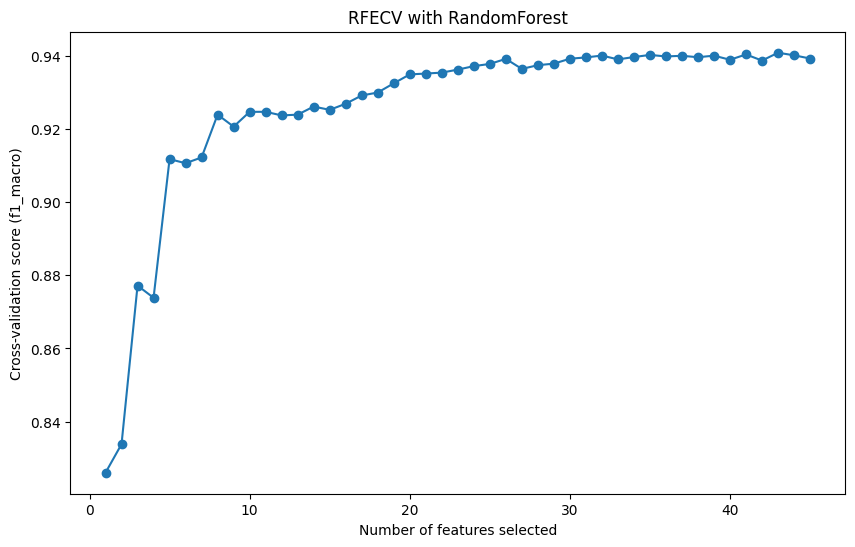

Optimal number of features: 43
Selected features: Index(['demog_1', 'demog_2', 'city_tier', 'occupation', 'demog_4', 'demog_5',
       'demog_8', 'demog_9', 'demog_15', 'demog_20', 'demog_21', 'others_1',
       'others_2', 'others_5', 'others_6', 'others_7', 'others_8', 'others_9',
       'others_10', 'others_11', 'others_12', 'others_13', 'others_21',
       'others_22', 'others_23', 'others_24', 'others_25', 'others_26',
       'others_28', 'demog_23', 'demog_24', 'demog_26', 'demog_30', 'demog_32',
       'others_35', 'others_36', 'others_39', 'email_domain', 'demog_40',
       'demog_43', 'account_opening_month', 'account_opening_year',
       'income_category'],
      dtype='object')


In [62]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv_rf.cv_results_['mean_test_score']) + 1),
         rfecv_rf.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (f1_macro)")
plt.title("RFECV with RandomForest")
plt.show()

# Optimal number of features
optimal_features = rfecv_rf.n_features_
print(f'Optimal number of features: {optimal_features}')

# Selected features
selected_features = X.columns[rfecv_rf.support_]
print(f'Selected features: {selected_features}')

### 2. RFE using XGBoost

In [69]:
# Initialize XGBClassifier
xgb = XGBClassifier(random_state=42,eval_metric='logloss')

# Initialize RFECV with cross-validation
rfecv_xgb = RFECV(estimator=xgb, step=1, cv=StratifiedKFold(5), scoring='f1_macro')

# Fit RFECV
rfecv_xgb.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='logloss',
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...),
      scoring='f1_macro')

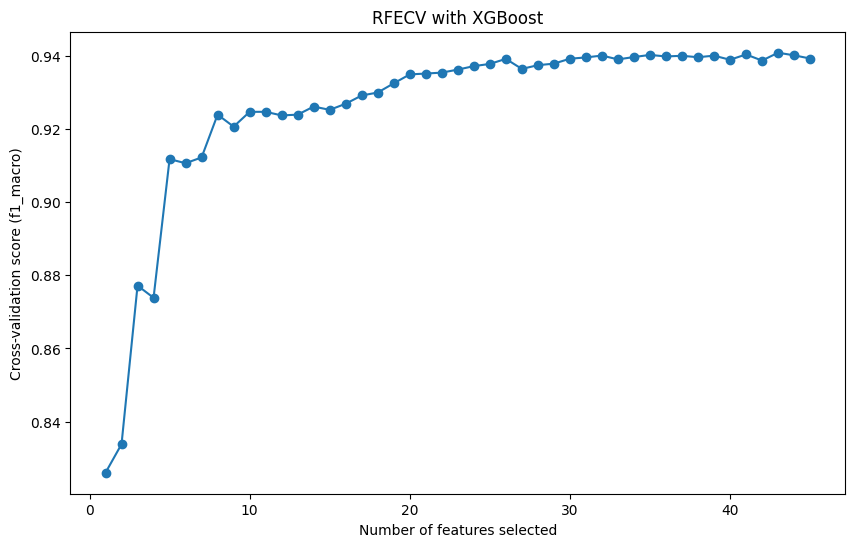

Optimal number of features: 35
Selected features: Index(['demog_1', 'demog_3', 'city_tier', 'occupation', 'demog_4', 'demog_9',
       'demog_15', 'demog_20', 'demog_21', 'others_1', 'others_2', 'others_5',
       'others_6', 'others_7', 'others_8', 'others_9', 'others_10',
       'others_11', 'others_12', 'others_13', 'others_21', 'others_22',
       'others_23', 'others_24', 'others_25', 'others_26', 'demog_23',
       'demog_24', 'demog_32', 'others_36', 'others_39', 'email_domain',
       'demog_40', 'demog_43', 'account_opening_month'],
      dtype='object')


In [70]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv_xgb.cv_results_['mean_test_score']) + 1),
         rfecv_rf.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (f1_macro)")
plt.title("RFECV with XGBoost")
plt.show()

# Optimal number of features
optimal_features = rfecv_xgb.n_features_
print(f'Optimal number of features: {optimal_features}')

# Selected features
selected_features = X.columns[rfecv_xgb.support_]
print(f'Selected features: {selected_features}')

In [71]:
selected_features_xgb = X.columns[rfecv_xgb.support_]
X_xgb = X[selected_features_xgb]

In [72]:
X_xgb

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,others_2,others_5,others_6,others_7,others_8,others_9,others_10,others_11,others_12,others_13,others_21,others_22,others_23,others_24,others_25,others_26,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month
0,53.0,101.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,168.0,133.0,2.0,689.0,133.0,3.0,168.0,168.0,8.0,16.0,0.0,0.0,8.0,16.0,168.0,7481.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
1,55.0,101.0,1.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,185.0,185.0,1.0,568.0,185.0,3.0,185.0,185.0,0.0,13.0,0.0,0.0,0.0,13.0,185.0,17461.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,55.0,101.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,239.0,239.0,1.0,239.0,239.0,1.0,239.0,239.0,4.0,14.0,0.0,0.0,4.0,14.0,239.0,8788.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
3,53.0,101.0,7.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,127.0,127.0,1.0,127.0,127.0,1.0,127.0,127.0,4.0,21.0,0.0,0.0,4.0,21.0,127.0,7065.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,55.0,101.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,200.0,200.0,1.0,200.0,200.0,1.0,200.0,200.0,1.0,3.0,0.0,0.0,1.0,3.0,200.0,8617.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96330,55.0,101.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,49.0,1.0,49.0,49.0,1.0,49.0,49.0,15.0,15.0,3.0,7.0,18.0,22.0,49.0,7299.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96331,55.0,101.0,0.0,6.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,8.0,8.0,1.0,370.0,8.0,2.0,8.0,8.0,13.0,13.0,13.0,13.0,26.0,26.0,9.0,9089.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0
96332,55.0,101.0,6.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,23.0,1.0,23.0,23.0,1.0,23.0,23.0,8.0,8.0,0.0,0.0,8.0,8.0,23.0,9629.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
96333,55.0,101.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,106.0,1.0,106.0,106.0,1.0,106.0,106.0,2.0,21.0,0.0,0.0,2.0,21.0,106.0,8487.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


### 3. fitcher Score

The Fisher score (or Fisher's criterion) is a measure of the importance of a feature by evaluating the ratio of variance between classes to the variance within classes.Fisher Score is a popular method used in feature selection to measure the discriminative power of features.

In [5]:
'''can't apply fisher score to this dataset because of memory allocation error'''

# from skfeature.function.similarity_based import fisher_score

# # Separate features and target
# X = train_df.drop(columns='Target').values
# y = train_df['Target'].values

# # Calculate Fisher Scores for each feature
# scores = fisher_score.fisher_score(X, y)

# # Select the indices of top N features
# N = 2  # For example, select top 2 features
# selected_indices = fisher_score.feature_ranking(scores)[:N]

# # Get the selected feature names
# selected_features = df.columns[selected_indices]
# print("Selected Features:", selected_features)



### 4. ANOVA

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif


selector = SelectKBest(score_func=f_classif, k=40).fit(X, y)
columns = X.columns[selector.get_support()]


c:\Users\sarth\anaconda3\envs\fraud_detection\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 9 13 63 67] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sarth\anaconda3\envs\fraud_detection\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [26]:
print(columns)

Index(['demog_1', 'occupation', 'demog_13', 'demog_16', 'demog_17', 'demog_20',
       'demog_21', 'others_1', 'others_2', 'others_3', 'others_5', 'others_6',
       'others_7', 'others_8', 'others_9', 'others_10', 'others_11',
       'others_12', 'others_13', 'others_14', 'others_18', 'others_21',
       'others_22', 'others_23', 'others_24', 'others_25', 'others_26',
       'others_29', 'others_31', 'demog_23', 'demog_24', 'demog_26',
       'demog_28', 'demog_32', 'demog_33', 'demog_37', 'others_35',
       'others_36', 'demog_40', 'demog_43'],
      dtype='object')


using different values of k for feature selection using ANOVA and applying StratifiedKFolds along with RandomForest to get the best value of K i.e. the value of K for which the performance metric is best

In [ ]:
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming your dataset is split into X (features) and y (target)
# # X = your features DataFrame
# # y = your target variable (categorical)

# # Initialize variables
# k_values = list(range(1, X.shape[1] + 1))  # Testing all possible values of k
# mean_scores = []

# # Perform cross-validation for each k value
# for k in k_values:
#     selector = SelectKBest(score_func=f_classif, k=k)
#     X_new = selector.fit_transform(X, y)
    
#     # Initialize classifier (e.g., Random Forest)
#     clf = RandomForestClassifier(random_state=42)
    
#     # Perform cross-validation
#     cv = StratifiedKFold(n_splits=5)
#     scores = cross_val_score(clf, X_new, y, cv=cv, scoring='accuracy')  # or any other metric
#     mean_scores.append(np.mean(scores))

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, mean_scores, marker='o')
# plt.xlabel('Number of Features (k)')
# plt.ylabel('Cross-Validated Accuracy')
# plt.title('Accuracy vs. Number of Features')
# plt.show()

# # Find the optimal number of features
# optimal_k = k_values[np.argmax(mean_scores)]
# print(f'Optimal number of features: {optimal_k}')


### 4. Forward Selection

using RF

In [73]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
clf = RandomForestClassifier(random_state=42,n_jobs=-1)

# Initialize SequentialFeatureSelector
sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select='auto',  # or specify the number of features, e.g., 10
    direction='forward',
    scoring='f1_macro',  # or 'f1' for f1-score, etc.
    cv=5,  # Number of folds in cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the SFS to the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features = X_train.columns[sfs.get_support()]

print("Selected features:", selected_features)


Selected features: Index(['demog_1', 'city_tier', 'occupation', 'demog_5', 'demog_21', 'others_1',
       'others_2', 'others_5', 'others_7', 'others_9', 'others_11',
       'others_23', 'others_25', 'others_26', 'demog_23', 'demog_26',
       'demog_32', 'others_36', 'email_domain', 'demog_40',
       'account_opening_month', 'account_opening_year'],
      dtype='object')


In [83]:
# Save the selected features to a text file
with open('../docs/SFS_RF_selected_features.txt', 'w') as f:
    f.write("Selected Features:\n")
    for feature in selected_features:
        f.write(f"{feature}\n")
    f.write("\n \n \n")
    f.write("parameters\n")
    for param in sfs.get_params():
        f.write(f"{param}: {sfs.get_params()[param]}\n")


Selected features have been saved to 'selected_features.txt'.


using XGB

In [85]:
from sklearn.feature_selection import SequentialFeatureSelector
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assume you have a DataFrame `train_df` with your features and target
X = train_df.drop(columns='Target')
y = train_df['Target']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss',device = 'cuda' )

# Initialize SequentialFeatureSelector with f1 scoring
sfs = SequentialFeatureSelector(estimator=xgb, 
                                 n_features_to_select='auto', 
                                 direction='forward', 
                                 scoring='f1_macro', 
                                 cv=5,
                                 n_jobs=-1)  # Adjust cv as needed

# Fit SFS
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['country_code', 'demog_6', 'demog_7', 'demog_9', 'demog_11', 'demog_12',
       'demog_14', 'demog_15', 'demog_16', 'demog_19', 'demog_21', 'others_5',
       'others_9', 'others_12', 'others_14', 'others_18', 'others_19',
       'others_20', 'others_21', 'others_23', 'others_24', 'others_27',
       'demog_23', 'demog_25', 'demog_27', 'demog_28', 'demog_29', 'demog_31',
       'demog_34', 'demog_35', 'demog_37', 'demog_38', 'others_33',
       'others_36', 'others_38', 'others_40', 'others_41', 'demog_39',
       'email_domain', 'demog_40', 'demog_41', 'demog_42',
       'account_opening_month'],
      dtype='object')


In [86]:
# Save the selected features to a text file
with open('../docs/SFS_XGB_selected_features.txt', 'w') as f:
    f.write("Selected Features:\n")
    for feature in selected_features:
        f.write(f"{feature}\n")
    f.write("\n \n \n")
    f.write("parameters\n")
    for param in sfs.get_params():
        f.write(f"{param}: {sfs.get_params()[param]}\n")
